### In this section we will dive into the Exploratory data analysis step. Mostly Data cleaning. As we have two data sets in our hands, we have to combine them and match the columns for each data. Let's go ahead

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data_1=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Final Capstone Project/v5_Latest_Data_Science_Salaries.csv")

In [3]:
data_2=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Final Capstone Project/global_ai_ml_data_salaries.csv")

## 1. Data cleaning and preprocessing

#### Information about the two data sets including the and names of columns.

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


In [5]:
data_1.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34422 entries, 0 to 34421
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           34422 non-null  int64 
 1   experience_level    34422 non-null  object
 2   employment_type     34422 non-null  object
 3   job_title           34422 non-null  object
 4   salary              34422 non-null  int64 
 5   salary_currency     34422 non-null  object
 6   salary_in_usd       34422 non-null  int64 
 7   employee_residence  34422 non-null  object
 8   remote_ratio        34422 non-null  int64 
 9   company_location    34422 non-null  object
 10  company_size        34422 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.9+ MB


In [7]:
data_2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Data Analyst,170186,USD,170186,US,0,US,M
1,2024,EN,FT,Data Analyst,170186,USD,170186,US,0,US,M
2,2024,MI,FT,Data Engineer,161000,USD,161000,US,0,US,M
3,2024,MI,FT,Data Engineer,119000,USD,119000,US,0,US,M
4,2024,MI,FT,Data Scientist,170186,USD,170186,US,0,US,M


##### There is an equal number of 11 columns in each dataset. But
1. Expertise level appears only in data_1 and remote_ratio appears only in data_2
2. Most columns that appear in both data are in different position
3. "remote_ratio" can just be remove as it is going to be of a significant importance. "Expetise_level" can also be removed as it is just the cloned version of experience level

#### Remove the unecessary columns

In [8]:
data_11=data_1.drop('Expertise Level', axis=1)

In [9]:
data_22=data_2.drop('remote_ratio', axis=1)

#### Rearrange the order of the second data set to match up with the order of the first data

In [10]:
data_11.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Salary',
       'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [11]:
data_22.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')

In [12]:
new_order = ['job_title', 'employment_type', 'experience_level', 'salary','salary_currency','company_location','salary_in_usd',
            'employee_residence','company_size','work_year']

In [13]:
data_22=data_22[new_order]

In [14]:
data_22.head(2)

,job_title,employment_type,experience_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,work_year
0,Data Analyst,FT,EN,170186,USD,US,170186,US,M,2024
1,Data Analyst,FT,EN,170186,USD,US,170186,US,M,2024


#### Rename the column of the first data set and have the same column names in the two data

In [15]:
data_11 = data_11.rename(columns={'Job Title': 'job_title', 'Employment Type': 'employment_type', 'Experience Level': 'experience_level', 'Salary': 'salary',
                                  'Salary Currency': 'salary_currency', 'Company Location': 'company_location',
                                 'Salary in USD': 'salary_in_usd', 'Employee Residence': 'employee_residence', 'Company Size': 'company_size','Year':'work_year'})


In [16]:
data_11.columns

Index(['job_title', 'employment_type', 'experience_level', 'salary',
       'salary_currency', 'company_location', 'salary_in_usd',
       'employee_residence', 'company_size', 'work_year'],
      dtype='object')

#### Merge the two Data sets

In [17]:
print(data_11.shape)
print(data_22.shape)

(3951, 10)
(34422, 10)


In [18]:
#salary_data=pd.merge(data_11, data_22, how='inner')

In [19]:
salary_data = data_11.append(data_22, ignore_index=True)


/tmp/ipykernel_6449/1556185808.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_data = data_11.append(data_22, ignore_index=True)


In [20]:
salary_data

,job_title,employment_type,experience_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,work_year
0,Staff Data Analyst,Contract,Entry,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,140100,United States Dollar,United States,140100,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...
38368,Data Scientist,FT,SE,412000,USD,US,412000,US,L,2020
38369,Principal Data Scientist,FT,MI,151000,USD,US,151000,US,L,2021
38370,Data Scientist,FT,EN,105000,USD,US,105000,US,S,2020
38371,Business Data Analyst,CT,EN,100000,USD,US,100000,US,L,2020


Some of the values mean the same thing but they are written differently. For instance "Full-Time" and "FT" under the employment_type column have the same meaning. However, in the language of data, they are different. We have to find a way to handle all those irregularities.

#### Missing values?

In [21]:
salary_data.isnull().count()

job_title             38373
employment_type       38373
experience_level      38373
salary                38373
salary_currency       38373
company_location      38373
salary_in_usd         38373
employee_residence    38373
company_size          38373
work_year             38373
dtype: int64

Luckily, there is not missing value.

##### The columns "salary", salary_in_usd", "salary_currency" and "work_year" do not need any further cleaning

#### Let's handle the columns individually

##### Job title

In [22]:
salary_data.job_title.value_counts()

Data Scientist                          7853
Data Engineer                           6628
Data Analyst                            4689
Machine Learning Engineer               4209
Software Engineer                       2429
                                        ... 
Machine Learning Operations Engineer       1
AI Data Scientist                          1
Data Engineer 2                            1
People Data Analyst                        1
Marketing Data Scientist                   1
Name: job_title, Length: 223, dtype: int64

##### Employment type

We are going to replace the values from the second data table with their corresponding values from the first table. Knowing the first data has 3951 rows.

In [23]:
salary_data.employment_type[:3951].value_counts()

Full-Time    3909
Contract       18
Part-Time      13
Freelance      11
Name: employment_type, dtype: int64

In [24]:
salary_data.employment_type[3951:].value_counts()

FT    34319
PT       50
CT       39
FL       14
Name: employment_type, dtype: int64

In [25]:
# Replace 'FT' with 'Full-Time','CT' with 'Contract', 'PT'  with 'Part-Time' and 'FL' with 'Freelance'
salary_data.employment_type[3951:]=salary_data.employment_type[3951:].replace({'FT':'Full-Time','CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'})

/tmp/ipykernel_6449/2123923457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.employment_type[3951:]=salary_data.employment_type[3951:].replace({'FT':'Full-Time','CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'})


In [26]:
salary_data.employment_type

0         Contract
1        Full-Time
2        Full-Time
3        Full-Time
4        Full-Time
           ...    
38368    Full-Time
38369    Full-Time
38370    Full-Time
38371     Contract
38372    Full-Time
Name: employment_type, Length: 38373, dtype: object

##### experience_level

In [27]:
salary_data.experience_level[:3951].value_counts()

Senior       2493
Mid           954
Entry         330
Executive     174
Name: experience_level, dtype: int64

In [28]:
salary_data.experience_level[3951:].value_counts()

SE    20905
MI     9760
EN     2985
EX      772
Name: experience_level, dtype: int64

In [29]:
# Replace 'SE' with 'Senior','MI' with 'Mid', 'EN'  with 'Entry' and 'EX' with 'Executive'
salary_data.experience_level[3951:]=salary_data.experience_level[3951:].replace({'SE':'Senior','MI':'Mid', 'EN':'Entry', 'EX':'Executive'})

/tmp/ipykernel_6449/4257537965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.experience_level[3951:]=salary_data.experience_level[3951:].replace({'SE':'Senior','MI':'Mid', 'EN':'Entry', 'EX':'Executive'})


In [30]:
salary_data.experience_level

0         Entry
1         Entry
2        Senior
3        Senior
4        Senior
          ...  
38368    Senior
38369       Mid
38370     Entry
38371     Entry
38372    Senior
Name: experience_level, Length: 38373, dtype: object

##### company_size	

In [31]:
salary_data.company_size[:3951].value_counts()

Medium    3309
Large      479
Small      163
Name: company_size, dtype: int64

In [32]:
salary_data.company_size[3951:].value_counts()

M    32831
L     1392
S      199
Name: company_size, dtype: int64

In [33]:
# Replace 'M' with 'Medium','L' with 'Large', and 's' with 'Small'
salary_data.company_size[3951:]=salary_data.company_size[3951:].replace({'M':'Medium','L':'Large', 'S':'Small'})

/tmp/ipykernel_6449/3761282728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.company_size[3951:]=salary_data.company_size[3951:].replace({'M':'Medium','L':'Large', 'S':'Small'})


In [34]:
salary_data.company_size

0         Large
1        Medium
2         Small
3        Medium
4        Medium
          ...  
38368     Large
38369     Large
38370     Small
38371     Large
38372     Large
Name: company_size, Length: 38373, dtype: object

##### Employee residency

The countries in the first data are written with their full name and the countries in the second data are written with their acronyms. Changing the acronyms with their corresposnding full names will be a great way to handle the "employee residence" and "company location" columns. However, as they are way too many countries, we will do that for only the 35 most  represented countries in the entire data set.

In [35]:
salary_data.employee_residence[3951:].value_counts()[:30]

US    31161
GB     1061
CA     1009
ES      143
DE      132
IN       95
FR       82
AU       78
NL       51
BR       35
PT       34
IT       29
IE       28
LT       28
ZA       27
EG       26
AR       25
MX       22
PL       19
TR       19
GR       17
LV       16
NZ       16
CO       16
PH       15
UA       14
NG       12
AT       12
EE       11
FI        9
Name: employee_residence, dtype: int64

In [36]:
salary_data.employee_residence[3951:]=salary_data.employee_residence[3951:].replace({'US':'United States','GB':'United Kingdom', 'CA':'Canada',
                                                                                  'ES':'Spain','DE':'Germany', 'IN':'India',
                                                                                    'FR':'France','AU':'Australia', 'NL':'Netherlands',
                                                                                    'BR':'Brazil','PT':'Portugal', 'IT':'Italy',
                                                                                    'IE':'Ireland','LT':'LIthuania', 'ZA':'South Africa',
                                                                                    'EG':'Egypt','AR':'Argentina', 'MX':'Mexico',
                                                                                    'PL':'Poland','TR':'Turkey', 'GR':'Greece',
                                                                                    'LV':'Latvia','NZ':'New Zealand', 'CO':'Colombia',
                                                                                    'PH':'Philippines','UA':'United Arab Emirates', 'NG':'Nigeria','CH':'China',
                                                                                    'AT':'Austria','EE':'Estonia', 'FI':'Finland','BE':'Belgium', 'GA':'Ghana'})

/tmp/ipykernel_6449/1501317819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.employee_residence[3951:]=salary_data.employee_residence[3951:].replace({'US':'United States','GB':'United Kingdom', 'CA':'Canada',


In [37]:
salary_data.employee_residence.value_counts()

United States     34125
United Kingdom     1348
Canada             1153
Spain               201
Germany             195
                  ...  
Luxembourg            1
Malta                 1
BM                    1
OM                    1
JE                    1
Name: employee_residence, Length: 144, dtype: int64

##### company_location

In [38]:
salary_data.company_location[3951:].value_counts()[:30]

US    31212
GB     1069
CA     1011
ES      139
DE      139
AU       81
IN       79
FR       78
NL       51
BR       33
PT       32
LT       28
IE       28
ZA       27
EG       25
MX       23
IT       22
AR       21
PL       19
TR       17
LV       16
NZ       16
CO       16
GR       15
AT       12
EE       12
PH       12
UA       12
FI       10
NG        9
Name: company_location, dtype: int64

In [39]:
salary_data.company_location[3951:]=salary_data.company_location[3951:].replace({'US':'United States','GB':'United Kingdom', 'CA':'Canada',
                                                                                  'ES':'Spain','DE':'Germany', 'IN':'India',
                                                                                    'FR':'France','AU':'Australia', 'NL':'Netherlands',
                                                                                    'BR':'Brazil','PT':'Portugal', 'IT':'Italy',
                                                                                    'IE':'Ireland','LT':'LIthuania', 'ZA':'South Africa',
                                                                                    'EG':'Egypt','AR':'Argentina', 'MX':'Mexico',
                                                                                    'PL':'Poland','TR':'Turkey', 'GR':'Greece',
                                                                                    'LV':'Latvia','NZ':'New Zealand', 'CO':'Colombia',
                                                                                    'PH':'Philippines','UA':'United Arab Emirates', 'NG':'Nigeria',
                                                                                    'AT':'Austria','EE':'Estonia', 'FI':'Finland','BE':'Belgium','CH':'China','GA':'Ghana'})

/tmp/ipykernel_6449/2734918442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.company_location[3951:]=salary_data.company_location[3951:].replace({'US':'United States','GB':'United Kingdom', 'CA':'Canada',


In [40]:
salary_data.company_location.value_counts()

United States           34223
United Kingdom           1362
Canada                   1156
Germany                   209
Spain                     194
                        ...  
Iraq                        1
Chile                       1
Moldova, Republic of        1
Malta                       1
MD                          1
Name: company_location, Length: 121, dtype: int64

#### It is time to save the post-cleaned data set in a new csv file

In [41]:
salary_data.to_csv('salary_data_new.csv', index=False)

In [42]:
salary_data_new=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Final Capstone Project/salary_data_new.csv")

In [43]:
salary_data_new.head()

,job_title,employment_type,experience_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,work_year
0,Staff Data Analyst,Contract,Entry,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,140100,United States Dollar,United States,140100,United States,Medium,2023


## 2. A/B testing case

I've observed that many industry experts start their careers as data analysts and later transition into data scientist roles as they gain more experience. This shift typically requires mastering additional technical skills like machine learning and advanced statistics. 

While data scientists generally earn more than data analysts, the learning curve can be overwhelming for some, leading them to remain in Data analyst roles. 

For data analysts curious about whether the salary difference justifies the move, we'll run an A/B test. First, we'll confirm that data scientists earn more on average, and then we'll analyze whether this difference is statistically significant.

#### Do Data scientists earn more than Data Analyst On average?

In [44]:
salary_data_new['job_title'].value_counts()

Data Scientist                          7853
Data Engineer                           6628
Data Analyst                            4689
Machine Learning Engineer               4209
Software Engineer                       2429
                                        ... 
Machine Learning Operations Engineer       1
AI Data Scientist                          1
Data Engineer 2                            1
People Data Analyst                        1
Marketing Data Scientist                   1
Name: job_title, Length: 223, dtype: int64

##### Average Data analyst salary

In [45]:
salary_data_new[salary_data_new['job_title']=='Data Analyst']['salary_in_usd'].mean()

109698.52548517808

##### Average Data Scientist salary

In [46]:
salary_data_new[salary_data_new['job_title']=='Data Scientist']['salary_in_usd'].mean()

160130.67133579522

#### Answer: Yes, Data scientists earn on average USD 160,000 while Data Analysts earn on average USD 110,000.

#### Do data scientists earn significantly more than data analysts??
#### Let's run an A/B testing

1. Hypotheses 

Ho. There is no significant difference in salary between data analysts and data scientist

H1. Although being a Data scientist requires more technical knwoledge, the difference in salary is significant enough to make the move from DA to DS.

2. Methodology: We have two groups 

Group A (Controled): Data Analyst salaries

Goup B (Variance): Data Scientist salaries

3. Metrics

In this experiment, we are testing the average yearly salary in USD for Data Analysts and Data Scientist

##### Analysis of the Datas

In [47]:
DA_salary=salary_data_new[salary_data_new['job_title']=='Data Analyst']['salary_in_usd']
DA_salary.describe()

count      4689.000000
mean     109698.525485
std       47344.245969
min       15000.000000
25%       76200.000000
50%      104000.000000
75%      137000.000000
max      774000.000000
Name: salary_in_usd, dtype: float64

In [48]:
DS_salary=salary_data_new[salary_data_new['job_title']=='Data Scientist']['salary_in_usd']
DS_salary.describe()

count      7853.000000
mean     160130.671336
std       65190.204661
min       16000.000000
25%      115000.000000
50%      155600.000000
75%      199000.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

DescribeResult(nobs=4689, minmax=(15000, 774000), mean=109698.52548517808, variance=2241477626.4145055, skewness=1.9595254857130038, kurtosis=17.274488981626916)
DescribeResult(nobs=7853, minmax=(16000, 750000), mean=160130.67133579522, variance=4249762783.750728, skewness=0.9102830784286547, kurtosis=4.0636582397604695)


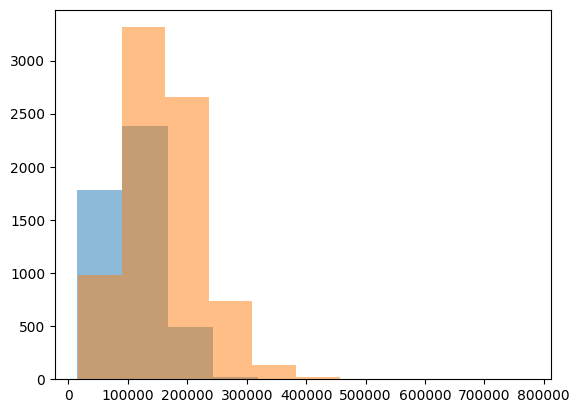

In [49]:
# Distribution of salaries in both groups.
plt.hist(DA_salary, alpha = .5)
plt.hist(DS_salary, alpha = .5)



print(stats.describe(DA_salary))
print(stats.describe(DS_salary))


The two datas seem to be not normality distributed and the values from the skweness and the kurtosis for both data prove it. Then in this case, the t_test is not going to be relevant here. Instead, let us use a Kruskal-Wallis test.

Before applying the Kruskal-Wallis, let's understand how the results will play out.
The test typically returns two key metrics. The statistics and the p.value

1. H-Statistic (Kruskal-Wallis H):

This is the test statistic computed by the Kruskal-Wallis test. It measures the difference in ranks between groups. The higher the H value, the more likely it is that at least one group differs significantly from the others.

2. P-Value:

The p-value tells you whether the observed differences between groups are statistically significant.\
Interpretation:\
P-value < 0.05: There is a significant difference between the groups.\
P-value ≥ 0.05: There is no statistically significant difference between the groups.

In [50]:
H_stat, p_value = stats.kruskal(DA_salary, DS_salary)

print(f"H-statistic: {H_stat}")
print(f"P-value: {p_value}")

# Check if p-value is significant
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the salaries.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between the salaries.")

H-statistic: 2096.3092455237365
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the salaries.


Text(0.5, 1.0, 'Average salaries')

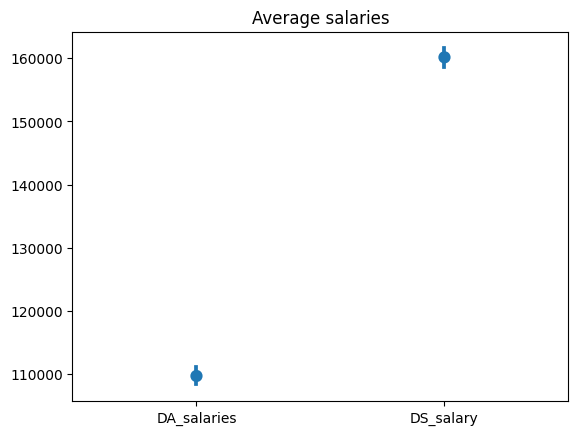

In [51]:
import seaborn as sns

g = sns.pointplot(data=[DA_salary, DS_salary], join=False)
                        
g.set(xticklabels = ['DA_salaries', 'DS_salary'])
plt.title("Average salaries")

#### Conclusion:  For any Data analyst considering switching to  a Data scientist role, it could be worth doing that because there will be a significant increase of their salaries.  However, it could also totally depends one people tastes, overall experience and companies.